# Fake News Project
The goal of this project is to create a fake news prediction system. Fake news is a major problem that can have serious negative effects on how people understand the world around them. You will work with a dataset containing real and fake news in order to train a simple and a more advanced classifier to solve this problem. This project covers the full Data Science pipeline, from data processing, to modelling, to visualization and interpretation.
## Part 1 Data Processing

### Task 1

In [45]:
import pandas as pd 
df = pd.read_csv("news_sample.csv")
dfcpy = df.copy()
dfcpy = dfcpy.dropna(subset=['content'])

In [46]:
# import nltk
# nltk.download('punkt')
# nltk.download('stopwords')

In [47]:
import re
import nltk
from nltk.tokenize.regexp import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist
from cleantext import clean


def clean_text(text):
  clean_text = re.sub(r'([A-Z][A-z]+.?) ([0-9]{1,2}?), ([0-9]{4})', '<DATE>', text)
  clean_text = clean(clean_text,
    lower=True,
    no_urls=True, replace_with_url="<URL>",
    no_emails=True, replace_with_email="<EMAIL>",
    no_numbers=True, replace_with_number= r"<NUM>",
    no_currency_symbols=True, replace_with_currency_symbol="<CUR>",
    no_punct=True, replace_with_punct="",
    no_line_breaks=True 
  )
  return clean_text

def rmv_stopwords(tokens):
  stop_words = set(nltk.corpus.stopwords.words('english'))
  tokens = [word for word in tokens if word not in stop_words]
  return tokens

def stem_tokens(tokens):
  stemmer=PorterStemmer()
  Output=[stemmer.stem(word) for word in tokens]
  return Output

# build a vocabulary from a dataframe with list of tokens
def build_vocabulary(df_tokens):
    # Flatten the list of tokens
  tokens = []
  for lst in df_tokens:
    tokens += lst
  fq = FreqDist(tokens)
  return fq

In [48]:
dfcpy = df.copy()

dfcpy.content = dfcpy.content.apply(clean_text)

tokenizer = RegexpTokenizer(r'<[\w]+>|[\w]+')
dfcpy["tokenized"] = dfcpy.content.apply(tokenizer.tokenize)

vocab = build_vocabulary(dfcpy.tokenized)
vocab_size = vocab.B()
print("After cleaning:")
print(f"vocabulary size: {vocab_size}\n")

dfcpy.tokenized = dfcpy.tokenized.apply(rmv_stopwords)
vocab = build_vocabulary(dfcpy.tokenized)
# reduction rate of the vocabulary size
reduction = ((vocab_size - vocab.B())/vocab_size)*100
vocab_size = vocab.B()
print("After removing stopwords:")
print(f"vocabulary size: {vocab_size}")
print(f"reduction rate of the vocabulary size: {reduction:.2f}%\n")

dfcpy.tokenized = dfcpy.tokenized.apply(stem_tokens)
vocab = build_vocabulary(dfcpy.tokenized)
reduction = ((vocab_size - vocab.B())/vocab_size)*100
vocab_size = vocab.B()
print("After stemming:")
print(f"vocabulary size: {vocab_size}")
print(f"reduction rate of the vocabulary size: {reduction:.2f}%\n")

After cleaning:
vocabulary size: 16577

After removing stopwords:
vocabulary size: 16445
reduction rate of the vocabulary size: 0.80%

After stemming:
vocabulary size: 11031
reduction rate of the vocabulary size: 32.92%




1. counting the number of URLs in the content
2. counting the number of dates in the content
3. counting the number of numeric values in the content
4. determining the 100 more frequent words that appear in the content
5. plot the frequency of the 10000 most frequent words (any interesting patterns?)
6. run the analysis in point 4 and 5 both before and after removing stopwords and applying stemming: do you see any difference?


In [49]:
# pip install "modin[ray]"
# import modin.pandas as pd

In [50]:
df = pd.read_csv("995,000_rows.csv", usecols=['content', 'type', 'url', 'title', 'authors', 'domain'], engine='c', dtype = str, nrows=70000)
dfcpy = df.copy()
dfcpy = dfcpy.dropna(subset=['content'])
dfcpy = dfcpy.dropna(subset=['type'])

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
# plot the frequency of the top n words
def plot_freq(fq, top_n):
  common_words = fq.most_common(top_n)
  # convert the list of tuples to a dictionary 
  all_freq = dict(common_words)
  # create a plot
  # plot most be less than 2^16 pixels in each direction
  plt.figure(figsize = (top_n*0.1, 5))
  plt.xticks(rotation = 90,fontsize = 5)
  plt.yticks(range(0, max(all_freq.values())+1, 50000))
  sns.lineplot(x = list(all_freq.keys()), y = list(all_freq.values()), color = 'red')
  sns.barplot(x = list(all_freq.keys()), y = list(all_freq.values()))
  plt.title(f'Top {top_n} most common words')
  plt.xlabel('Words')
  plt.ylabel('Frequency')
  plt.grid(axis = 'y')
  plt.show()
  return

In [52]:
dfcpy.content = dfcpy.content.apply(clean_text)

In [ ]:
tokenizer = RegexpTokenizer(r'<[\w]+>|[\w]+')
dfcpy["tokenized"] = dfcpy.content.apply(tokenizer.tokenize)


In [ ]:
dfcpy.tokenized = dfcpy.tokenized.apply(rmv_stopwords)

In [ ]:
dfcpy.tokenized = dfcpy.tokenized.apply(stem_tokens)

In [ ]:
vocab = build_vocabulary(dfcpy.tokenized)

In [ ]:
dfcpy.to_csv('cleaned_news_sample.csv', index=False)

## Data exploration

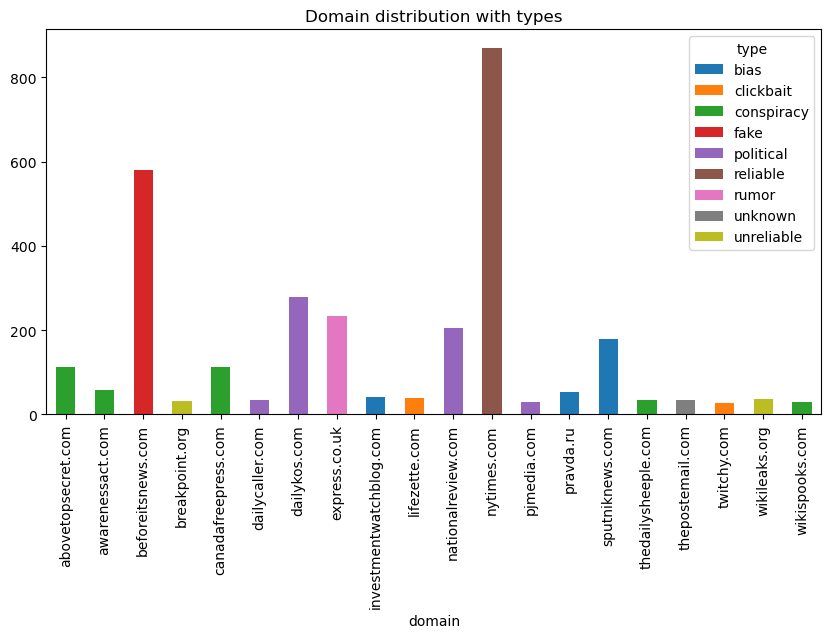

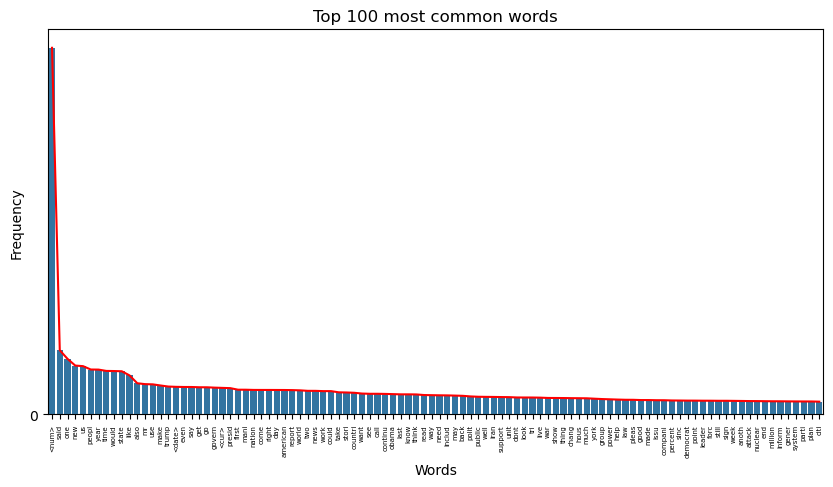

In [ ]:
# make tokenize colum into a string with whitespace separator

# plot distrubution of types only for the top 10 types
# dfcpy.domain.value_counts().head(20).plot(kind='bar', figsize=(10,5), title='Domain distribution')

def plot_domain_with_type(df):
  # make stacked bar plot for the top 20 domains with their types where am
  top_domains = df.domain.value_counts().head(20).index
  df = df[df.domain.isin(top_domains)]
  df = df.groupby(['domain', 'type']).size().unstack().fillna(0)

  df.plot(kind='bar', stacked=True, figsize=(10,5), title='Domain distribution with types')
  plt.show()
  return

# domain distribution and their tyoes
plot_domain_with_type(dfcpy)

# most frequent words
dfcpy.tokenized = dfcpy.tokenized.apply(lambda x: ' '.join(x))
num_freq = vocab.get("<num>",0)
plot_freq(vocab, 100)



# Task 4

Training Set:
3010    ['ten', 'year', 'ago', 'jame', 'freeman', 'roa...
4389    ['time', 'run', 'enact', 'import', 'econom', '...
3987    ['next', 'presid', 'next', 'presid', 'mr', 'cl...
556     ['sister', 'go', 'awesom', 'parent', 'sister',...
4137    ['suprem', 'court', 'unit', 'state', 'rule', '...
Name: tokenized, dtype: object


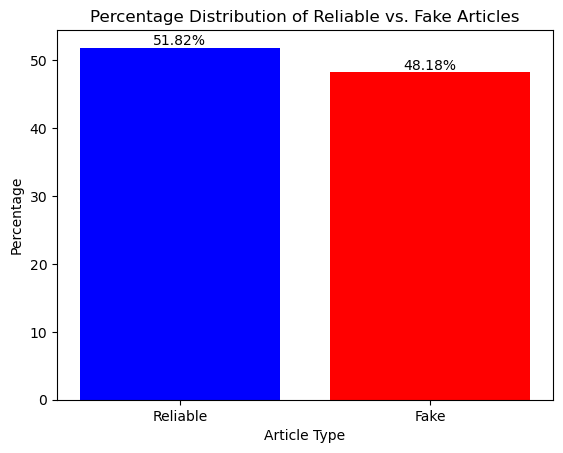

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv('cleaned_news_sample.csv')
dfcpy = df.copy()


# label is 1 if the article is fake, 0 if the article is reliable
dfcpy['label'] = dfcpy['type'].map({'fake': 1, 'conspiracy': 1, 'junksci': 1, 'bias': 1, 'clickbait': 0, 'political': 0, 'reliable': 0})
dfcpy = dfcpy.dropna(subset=['label'])
dfcpy['label'] = dfcpy['label'].astype(int)

X = dfcpy['tokenized']

y = dfcpy['label']

train_ratio = 0.80
validation_ratio = 0.10
test_ratio = 0.10

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 1 - train_ratio, random_state = 42) 
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size= test_ratio / (test_ratio + validation_ratio), random_state = 42)

print("Training Set:")
print(x_train.head())

# Examine the percentage distribution of 'reliable' vs. 'fake' articles
grouped_type = dfcpy['label'].value_counts()
grouped_type = grouped_type / grouped_type.sum() * 100

# make a bar plot with percentages on bars
plt.bar([0, 1], grouped_type, tick_label=['Reliable', 'Fake'], color=['blue', 'red'])
plt.text(0, grouped_type[0], f'{grouped_type[0]:.2f}%', ha='center', va='bottom')
plt.text(1, grouped_type[1], f'{grouped_type[1]:.2f}%', ha='center', va='bottom')
plt.xlabel('Article Type')
plt.ylabel('Percentage')
plt.title('Percentage Distribution of Reliable vs. Fake Articles')
plt.show()


X_train = x_train.apply(lambda x: np.str_(x))
X_val = x_val.apply(lambda x: np.str_(x))
X_test = x_test.apply(lambda x: np.str_(x))

# Part 2: A simple model

              precision    recall  f1-score   support

        fake       0.77      0.82      0.79       218
        real       0.77      0.72      0.75       188

    accuracy                           0.77       406
   macro avg       0.77      0.77      0.77       406
weighted avg       0.77      0.77      0.77       406



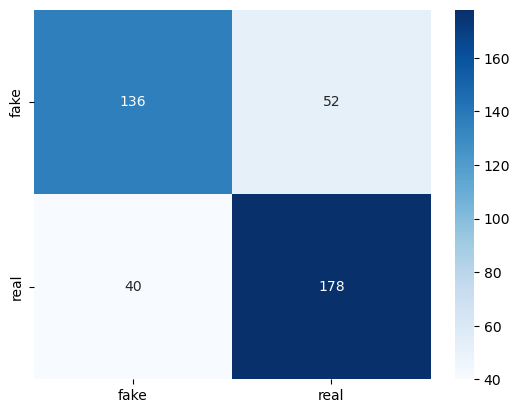

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X_train = x_train.apply(lambda x: np.str_(x))
X_val = x_val.apply(lambda x: np.str_(x))
# scaling the data
model = Pipeline([("tfidf", TfidfVectorizer()),
                ("scaler", StandardScaler(with_mean=False)), 
                ("log_reg", LogisticRegression())])

model.fit(x_train, y_train)
y_pred = model.predict(x_val)

# confusion matrix
confusion_matrix = metrics.confusion_matrix(y_val, y_pred, labels=[1, 0])
sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['fake', 'real'], yticklabels=['fake', 'real'])

# classification report
classification_report = metrics.classification_report(y_val, y_pred, target_names = ['fake', 'real'], zero_division=0)
print(classification_report)


# Part 3: Advanced model

2 models: 
- LinearSVM
- Naive bayes

2 vector representations:
- TF-IDF 1 2 grams
- Word embedding (doc2vec & word2vec)

We perfrom cross validation on hyper paramaters to find the best hyperparameters for each model 

##  TF-IDF vectorizer

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline


pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(ngram_range=(2, 2))),
    ('scaler', StandardScaler(with_mean=False)),
    ])

# Fit and transform your training data
X_train_DIM = pipeline.fit_transform(x_train, y_train)  # You need to provide the labels for LDA

# Transform your validation and test data
X_val_DIM = pipeline.transform(x_val)
X_test_DIM = pipeline.transform(x_test)

In [ ]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.pipeline import Pipeline
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


# pipeline = Pipeline([
#     ('vectorizer', TfidfVectorizer(ngram_range=(1, 2))),
#     ('scaler', StandardScaler(with_mean=False)),
#     ('lda', LDA(n_components=100))  
#     ])

# # Fit and transform your training data
# X_train_DIM = pipeline.fit_transform(x_train, y_train)  # You need to provide the labels for LDA


# X_train_DIM.toarray() 
# # Transform your validation and test data
# X_val_DIM = pipeline.transform(x_val)
# X_test_DIM = pipeline.transform(x_test)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline

# Define the steps in your pipeline
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(ngram_range=(1, 2))),
    ('scaler', StandardScaler(with_mean=False)),
    ('svd', TruncatedSVD(n_components=500))  
    ])

# Fit and transform your training data

X_train_DIM = pipeline.fit_transform(X_train, y_train)  # You need to provide the labels for LDA

# Transform your validation and test data
X_val_DIM = pipeline.transform(X_val)
X_test_DIM = pipeline.transform(x_test)


In [ ]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.pipeline import Pipeline
# from sklearn.decomposition import PCA

# # Define the steps in your pipeline
# pipeline = Pipeline([
#     ('vectorizer', TfidfVectorizer(ngram_range=(1, 2))),
#     ('scaler', StandardScaler(with_mean=False)),
#     ('pca', PCA(n_components=0.95))  
#     ])

# # Fit and transform your training data
# X_train_DIM = pipeline.fit_transform(x_train, y_train)  # You need to provide the labels for LDA

# # Transform your validation and test data
# X_val_DIM = pipeline.transform(x_val)
# X_test_DIM = pipeline.transform(x_test)

## Word embedding

### word2vec

### Doc2vec

# Logistic regression

### TF-IDF

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logistic = LogisticRegression(max_iter=1000, random_state=42)

pipeline_logistic = Pipeline([
    ('vectorizer', TfidfVectorizer(ngram_range=(2, 2))),
    ('scaler', StandardScaler(with_mean=False)),
    ('logistic', logistic)
])

# Define the parameters grid to search
parameters = {
    'logistic__C': [1e-5, 1e-4, 1e-3, 1], # Regularization       
}

# Perform grid search using cross-validation
grid_search = GridSearchCV(pipeline_logistic, parameters , cv=5, n_jobs=-1, scoring= 'f1')
grid_search.fit(x_train, y_train)

# Best parameters found during grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'logistic__C': 0.0001}


              precision    recall  f1-score   support

        fake       0.77      0.82      0.79       218
        real       0.77      0.72      0.75       188

    accuracy                           0.77       406
   macro avg       0.77      0.77      0.77       406
weighted avg       0.77      0.77      0.77       406



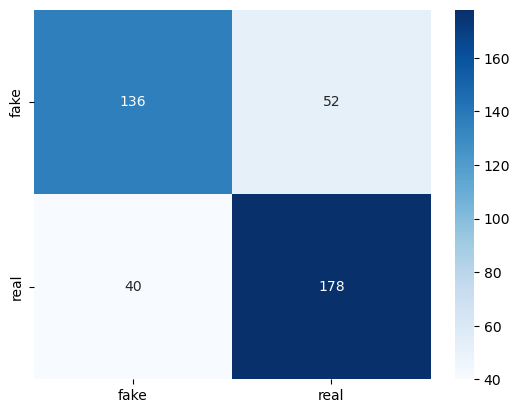

In [ ]:
# confusion matrix
confusion_matrix = metrics.confusion_matrix(y_val, y_pred, labels=[1, 0])
sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['fake', 'real'], yticklabels=['fake', 'real'])

# classification report
classification_report = metrics.classification_report(y_val, y_pred, target_names = ['fake', 'real'], zero_division=0)
print(classification_report)

### Word embedding

## Model 2: Linear SVC 

Best Parameters: {'svc__C': 1e-05, 'svc__tol': 0.0001}
              precision    recall  f1-score   support

        fake       0.78      0.87      0.82       218
        real       0.82      0.72      0.77       188

    accuracy                           0.80       406
   macro avg       0.80      0.79      0.79       406
weighted avg       0.80      0.80      0.80       406



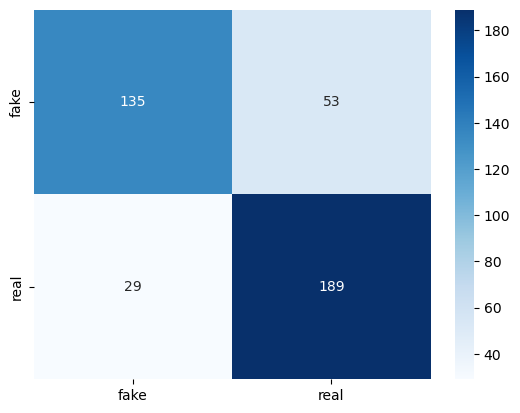

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

svc = LinearSVC(dual=True, max_iter=10000)

pipeline_svc = Pipeline([
    ('vectorizer', TfidfVectorizer(ngram_range=(1, 2))),
    ('scaler', StandardScaler(with_mean=False)),  # Note: Not used in LinearSVC but retained for pipeline consistency
    ('svc', svc)
])


parameters = {
    'svc__C': [1e-5, 1e-4, 1e-3, 1],  # Regularization 
    'svc__tol': [1e-4, 1e-3, 1],  # Tolerance for stopping criteria
}

# Cross-validation
grid_search = GridSearchCV(pipeline_svc, parameters, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)


y_pred = grid_search.predict(x_val)

# confusion matrix
confusion_matrix = metrics.confusion_matrix(y_val, y_pred, labels=[1, 0])
sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['fake', 'real'], yticklabels=['fake', 'real'])

# classification report
classification_report = metrics.classification_report(y_val, y_pred, target_names = ['fake', 'real'], zero_division=0)
print(classification_report)


Using word embedding

## Model 3: Naive bayes

Best Parameters: {'nb__alpha': 1000}
              precision    recall  f1-score   support

        fake       0.77      0.89      0.82       218
        real       0.84      0.69      0.75       188

    accuracy                           0.79       406
   macro avg       0.80      0.79      0.79       406
weighted avg       0.80      0.79      0.79       406



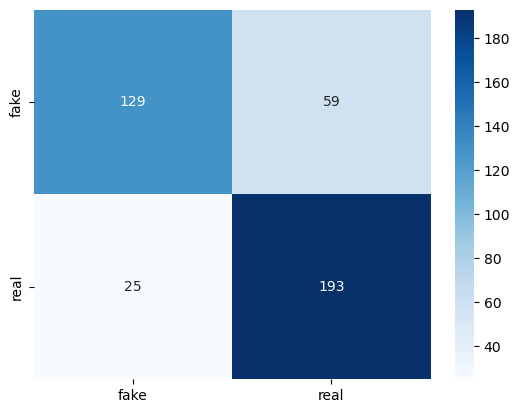

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

nb = MultinomialNB()

pipeline_nb = Pipeline([
    ('vectorizer', TfidfVectorizer(ngram_range=(1, 2))),
    ('scaler', StandardScaler(with_mean=False)),  # Note: Not used in Naive Bayes but retained for pipeline consistency
    ('nb', nb)
])


param_grid = {
    'nb__alpha': [1, 10, 100, 1000, 10000],  # Smoothing
}

# Cross-validation
grid_search = GridSearchCV(pipeline_nb, param_grid, cv=5, n_jobs=-1, scoring='f1')
grid_search.fit(x_train, y_train)


best_params = grid_search.best_params_
print("Best Parameters:", best_params)

y_pred = grid_search.predict(x_val)

# confusion matrix
confusion_matrix = metrics.confusion_matrix(y_val, y_pred, labels=[1, 0])
sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['fake', 'real'], yticklabels=['fake', 'real'])

# classification report
classification_report = metrics.classification_report(y_val, y_pred, target_names = ['fake', 'real'], zero_division=0)
print(classification_report)

Word embbeding 

# Random forrest

Best Parameters: {'rf__max_depth': 30, 'rf__n_estimators': 200}
              precision    recall  f1-score   support

        fake       0.84      0.80      0.82       218
        real       0.78      0.82      0.80       188

    accuracy                           0.81       406
   macro avg       0.81      0.81      0.81       406
weighted avg       0.81      0.81      0.81       406



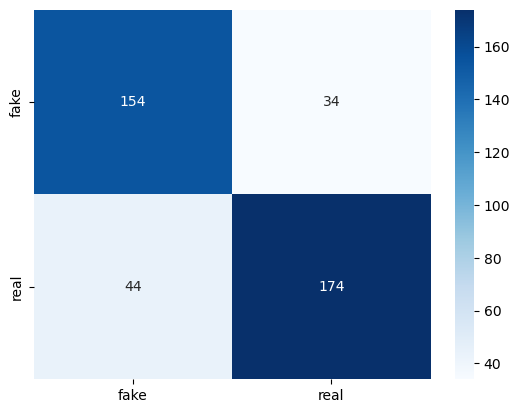

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

pipeline_rf = Pipeline([
    ('vectorizer', TfidfVectorizer(ngram_range=(1, 2))),
    ('rf', rf)
])


param_grid = {
    'rf__n_estimators': [100, 200, 300],  
    'rf__max_depth': [10, 20, 30],  
}

# Cross-validation
grid_search = GridSearchCV(pipeline_rf, param_grid, cv=5, n_jobs=-1, scoring='f1')
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

y_pred = grid_search.predict(x_val)

# confusion matrix
confusion_matrix = metrics.confusion_matrix(y_val, y_pred, labels=[1, 0])
sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['fake', 'real'], yticklabels=['fake', 'real'])

# classification report
classification_report = metrics.classification_report(y_val, y_pred, target_names = ['fake', 'real'], zero_division=0)
print(classification_report)